In [1]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.nn.functional as F
import pandas as pd

In [2]:
df=pd.read_csv("C://Users//sebas//OneDrive//Documents//Data//fer2013.csv")
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [3]:
label_map=['Anger','Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

In [4]:
df_train=df[df['Usage']=='Training']
df_val=df[df['Usage']=='PrivateTest']
df_test=df[df['Usage']=='PublicTest']

In [5]:
train_samples=np.array([np.fromstring(img, np.uint8, sep=" ").reshape((1,48,48)) for img in df_train['pixels']])
train_labels=df_train['emotion'].values

train_samples.shape

(28709, 1, 48, 48)

In [6]:
class ImageReader(Dataset):
    def __init__(self, raw_data, raw_labels, transforms=None):
        self.data=raw_data
        self.labels=raw_labels
        self.transforms=transforms
    
    def __getitem__(self, idx):
        face=self.data[idx]
        #labels=self.labels.astype(np.int32).values[idx]
        labels = torch.LongTensor(self.labels)[idx]
        
        if self.transforms:
            face = self.transforms(face)
    
        return face, labels
        
    def __len__(self):
        return len(self.labels)

In [7]:
transform = transforms.Compose([transforms.ToPILImage(),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, ), (0.5, ))])

In [8]:
train_data=ImageReader(train_samples, train_labels,transforms=None)

In [9]:
train_loader=DataLoader(train_data,batch_size=4, shuffle=True)
print(len(train_loader))

7178


In [10]:
for img, labels in train_loader:
    break
print(img.shape)
print(labels)

torch.Size([4, 1, 48, 48])
tensor([2, 6, 2, 3])


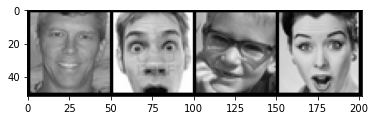

Happy Surprise Happy Surprise


In [11]:
def imshow(img):
    #img = img / 2 + 0.5 
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % label_map[labels[j]] for j in range(4)))

In [12]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1,6,3,1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 3,1)
        self.fc1 = nn.Linear(16 * 10 * 10, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x.float())))
        x = self.pool(F.relu(self.conv2(x.float())))
        x = x.view(-1, 16 * 10 * 10)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [13]:
print(net.parameters())

<generator object Module.parameters at 0x0000021211CB5248>


In [14]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [41]:
total_epochs = 5

train_


for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        #loss = criterion(outputs, labels)
        loss = criterion (outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.754
[1,  4000] loss: 1.734
[1,  6000] loss: 1.721
[2,  2000] loss: 1.645
[2,  4000] loss: 1.616
[2,  6000] loss: 1.618
Finished Training


In [43]:
test_samples=np.array([np.fromstring(img, np.uint8, sep=" ").reshape((1,48,48)) for img in df_test['pixels']])
test_labels=df_test['emotion'].values

test_data=ImageReader(test_samples, test_labels,transforms=None)

test_loader=DataLoader(test_data,batch_size=4, shuffle=True)

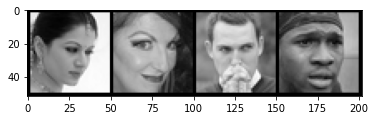

GroundTruth:  Neutral Happy   Sad   Sad


In [46]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % label_map[labels[j]] for j in range(4)))